In [22]:
!pip3 install soundfile
!pip install tensorflow-gpu==2.0.0

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import soundfile

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv1D

# Upload signals

In [24]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
sound1 = '/content/drive/My Drive/Colab Notebooks/GuitarAmpEffects/Neuron1_session.wav'
songdata, samplerate = soundfile.read(sound1)

Mounted at /content/drive


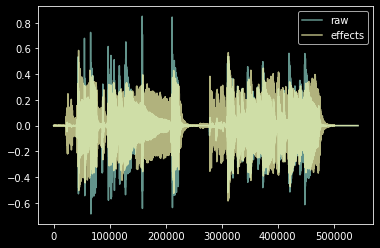

In [25]:
x_t = songdata[:,1] # raw signal
y_t = songdata[:,0] # signal with effects

plt.plot(x_t, alpha = 0.7, label='raw')
plt.plot(y_t, alpha = 0.7, label='effects')
plt.legend()
plt.show()

# Create dataset

In [0]:
def get_training_data(a, b, input_layer_size):
  c = np.zeros([len(a)-(input_layer_size-1),input_layer_size])
  d = np.zeros([len(a)-(input_layer_size-1),input_layer_size])

  for i in range(len(a)-(input_layer_size-1)):
    c[i] = a[i:i+input_layer_size]
    d[i] = b[i:i+input_layer_size]
  
  return (c,d)

def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [0]:
x,y = get_training_data(x_t, y_t, input_size)
x,y = unison_shuffled_copies(x,y)

In [0]:
x_s = np.fft.rfft(x)
y_s = np.fft.rfft(y)

In [30]:
x_s.shape
input_size = x_s.shape[1]
input_size

65

# Train model

In [34]:
# %%time 

model = Sequential()

model.add(Dense(input_size)) # input layer (previously Dense(512))
model.add(Activation('linear'))

model.add(Dense(input_size)) # output layer (previously Dense(512))
model.add(Activation('linear'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['accuracy'])


history_convnet4l = model.fit(x_s,y_s, batch_size=32, epochs=1, validation_split=.2,shuffle=True)

err_convnet4l, acc_convnet4l = model.evaluate(x_s,y_s, verbose=0)

print('Final Accuracy: ',acc_convnet4l*100,"%")

Train on 434456 samples, validate on 108615 samples
Epoch 1/20
434456/434456 [==============================] - 59s 135us/sample - loss: 1.0234 - accuracy: 0.3095 - val_loss: 1.0228 - val_accuracy: 0.2712
Epoch 2/20
434456/434456 [==============================] - 59s 136us/sample - loss: 1.0215 - accuracy: 0.3145 - val_loss: 1.0228 - val_accuracy: 0.4041
Epoch 3/20
434456/434456 [==============================] - 58s 133us/sample - loss: 1.0213 - accuracy: 0.3118 - val_loss: 1.0225 - val_accuracy: 0.4055
Epoch 4/20
434456/434456 [==============================] - 58s 133us/sample - loss: 1.0212 - accuracy: 0.3146 - val_loss: 1.0227 - val_accuracy: 0.3008
Epoch 5/20
434456/434456 [==============================] - 57s 132us/sample - loss: 1.0211 - accuracy: 0.3191 - val_loss: 1.0227 - val_accuracy: 0.2564
Epoch 6/20
434456/434456 [==============================] - 57s 131us/sample - loss: 1.0211 - accuracy: 0.3138 - val_loss: 1.0222 - val_accuracy: 0.2651
Epoch 7/20
434456/434456 [====

ValueError: ignored

In [36]:
err_convnet4l, acc_convnet4l = model.evaluate(x_s,y_s, verbose=0)

print('Final Accuracy: ',acc_convnet4l*100,"%")

Final Accuracy:  28.641191124916077 %


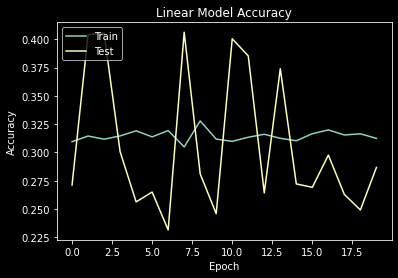

In [37]:
plt.plot(history_convnet4l.history['accuracy'])
plt.plot(history_convnet4l.history['val_accuracy'])
plt.title('Linear Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [38]:
# model.save('drive/My Drive/ClassificationData/CarpetTileDataset/CarpTileModelIgnore.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              multiple                  4290      
_________________________________________________________________
activation_4 (Activation)    multiple                  0         
_________________________________________________________________
dense_5 (Dense)              multiple                  4290      
_________________________________________________________________
activation_5 (Activation)    multiple                  0         
Total params: 8,580
Trainable params: 8,580
Non-trainable params: 0
_________________________________________________________________


# Apply model to test signal

In [41]:
z_s = np.zeros([len(x_s)])
x_s_ = np.array(np.fft.rfft(x_t))

for i in range(int(len(x_s)/input_size)):
  z_s[i*input_size:input_size*(i+1)] = model.predict(np.reshape(x_s_[i*input_size:input_size*(i+1)], (1, input_size)))

z_t = np.fft.rfft(z_s)

AttributeError: ignored

In [0]:
plt.plot(x_t,alpha=1, label='raw')
plt.plot(y_t-1.5,alpha=1, label='effects')
plt.plot(z_t-3,alpha=1, label='neural')
plt.legend()
plt.show()

In [0]:
signal_location = 'drive/My Drive/NeuralComparison7.wav'
comparison_t = np.concatenate((x_t, y_t, z_t))
soundfile.write(signal_location, comparison_t, samplerate)